<a href="https://colab.research.google.com/github/lucas-fpaiva/matopiba_emissions/blob/main/code/part2_groups_profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MATOPIBA emissions profile code 
**Part 2: Interpretation of groups to identify the emissions profile**


Links for all code:
* [Part 1: Groups identification](https://colab.research.google.com/github/lucas-fpaiva/matopiba_emissions/blob/main/code/part1_groups_identification.ipynb#scrollTo=fmLf4ECyHt3F)
* [Part 2: Interpretation of groups to identify the emissions profile](https://colab.research.google.com/github/lucas-fpaiva/matopiba_emissions/blob/main/code/part2_groups_profile.ipynb)
* [Part 3: Spatial relationship of groups](https://colab.research.google.com/github/lucas-fpaiva/matopiba_emissions/blob/main/code/part3_groups_spatial_.ipynb)



In [1]:
#Installing all libraries used for analysis
import numpy as np
import pandas as pd


#statistical tests
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import bartlett


#Installing all libraries used for visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pandas.plotting import radviz
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

## Data

In [2]:
#Collecting the Matopiba Emissions Data
!git clone https://github.com/lucas-fpaiva/matopiba_emissions.git

Cloning into 'matopiba_emissions'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 265 (delta 87), reused 4 (delta 1), pack-reused 121
Receiving objects: 100% (265/265), 47.99 MiB | 7.02 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [3]:
# load data grups and emissions
data = pd.read_csv('/content/matopiba_emissions/data/matopiba_groups.csv')

In [4]:
#accessible color palette
correct_color = [(0.3764705882352941, 0.3764705882352941, 0.3764705882352941, 1),
                 (0, 0, 0.6470588235294118, 1),
                 (0, 0.6666666666666666, 0.6274509803921569, 1),
                 (0, 0.9764705882352941, 0, 1),
                 (0.8431372549019608, 0, 0, 1),
                 (1.0, 0.807843137254902, 0.0392156862745098, 1),
                 (0.1, 0.1, 0.1, 1)]



features=["Agriculture","LUC","Energy","Waste"]
features_group=["Agriculture","LUC","Energy","Waste","group"]

fontsize = 18

sns.set_theme()

# Groups presentation



In [5]:
l=range(1,max(data.group)+1)

count=0

grupos =[]

ps_all = []

print("All ns tests:")
parametric = True
for coluna in features:
    count+=1
    k=0

    ps=[]
    met = []
    for i in l:
        k+=1
        for j in l[k:]:
            ''' Checking if we can use parametric test'''
            
            cat1 = data[data['group']==i]
            cat2 = data[data['group']==j]
            
            #Checking the size of samples
            if min(len(cat1[coluna]),len(cat2[coluna]))>20:
                parametric = True
            else: parametric = False
            
            #checking normality
            if parametric:
                _, p_1 = stats.normaltest(cat1[coluna])
                if p_1>=0.05:
                    parametric = True

                else: parametric = False
            
            if parametric:
                _, p_2 = stats.normaltest(cat2[coluna])
                if p_2>=0.05:
                    parametric = True
                else: parametric = False
            
            #Checking Homoscedasticity
            if parametric:
                _, p_v = bartlett(cat1[coluna], cat2[coluna])
                if p_v>=0.05:
                    parametric = False
                
                
            # difference test
            if parametric:
                _,p=ttest_ind(cat1[coluna], cat2[coluna])
                if p<0.01:
                    met.append('t**')
                elif 0.01<p<0.05:
                    met.append('t*')
                else:
                    met.append('t')
                    print(coluna+str(i)+str(j))
                ps.append(p)
            else:
                _,p=mannwhitneyu(cat1[coluna], cat2[coluna])
                ps.append(p)
                if p<0.01:
                    met.append('U**')
                elif 0.01<p<0.05:
                    met.append('U*')
                else:
                    met.append('U')
                    print(coluna+' '+str(i)+'_'+str(j))
     
            if count==1:
                grupos.append(str(str(i)+'_'+str(j)))
            
    if count==1:
        ps_all.append(grupos)
            
    ps_all.append(ps)
    ps_all.append(met)

All ns tests:
Agriculture 3_5
LUC 3_4
Energy 1_2
Energy 1_4
Energy 2_4
Waste 1_2
Waste 3_4
Waste 3_6


In [6]:
ps_all = np.array(ps_all).transpose()
dif = pd.DataFrame(ps_all,columns=['Comparison',"Agriculture",'Test',"LUC",'Test',"Energy",'Test','Waste','Test'])

#save the statistical results 
dif.to_csv('/content/matopiba_emissions/output/statistic.csv')

dif.head(20)

,Comparison,Agriculture,Test,LUC,Test,Energy,Test,Waste,Test
0,1_2,1.2448431858010879e-28,U**,1.5907377961052222e-27,U**,0.23250153871649726,U,0.4854000254153665,U
1,1_3,3.955832643326857e-06,U**,7.962257393843353e-08,U**,7.962257393843353e-08,U**,0.020984042671875217,U*
2,1_4,1.1071057331383535e-19,U**,3.3875709613084095e-82,t**,0.05711890490958796,U,0.0003849402246884096,U**
3,1_5,4.689563270528249e-29,U**,4.4362557022662573e-32,U**,0.04283780228016201,U*,0.009695830114913267,U**
4,1_6,0.03621960770603322,U*,2.982283710008492e-44,t**,8.163318947786204e-15,U**,5.5289197156789206e-08,U**
5,2_3,2.3328212823671318e-07,U**,2.7641012166317565e-07,U**,2.3328212823671318e-07,U**,0.0268325047466269,U*
6,2_4,1.5891175328256985e-15,U**,4.719623111214117e-16,U**,0.17873325369050164,U,0.0010224924593972662,U**
7,2_5,5.676353777659301e-25,U**,5.676353777659301e-25,U**,0.013037291417984829,U*,0.01583936316950927,U*
8,2_6,4.3256594214999905e-11,U**,0.00014379021445242384,U**,2.7705926343397613e-13,U**,1.000286388022296e-07,U**
9,3_4,9.48892142100752e-07,U**,0.2517881963497022,U,9.48892142100752e-07,U**,0.2346940383948135,U


In [7]:
grupos = []
estados = ['MA','TO', 'PI','BA']

# Taking the percentage distribution of states by group
for i in range(1,7):
    linha =[]
    grupo = data[data['group']==i]
    count_grupo=grupo.shape[0]
    linha.append('G' +str(i))
    for est in estados:
        # Percentage calculation
        linha.append(round(100*len(grupo[grupo['States'] == est])/count_grupo,2)) 
    
    grupos.append(linha)
tab2 = pd.DataFrame(grupos,columns=['Group','MA','TO','PI','BA'])
tab2.head(7)

,Group,MA,TO,PI,BA
0,G1,45.08,40.16,9.02,5.74
1,G2,30.65,61.29,6.45,1.61
2,G3,40.00,50.00,0.00,10.00
3,G4,8.57,42.86,11.43,37.14
4,G5,54.88,24.39,14.63,6.10
5,G6,34.62,46.15,7.69,11.54


In [8]:
# Calculating the percentage of states in the matopiba
data.groupby(by='States')['Municipalities'].count().head()/337*100

States
BA     8.902077
MA    40.059347
PI     9.792285
TO    41.246291
Name: Municipalities, dtype: float64

### Initial view of the groups' emission profile

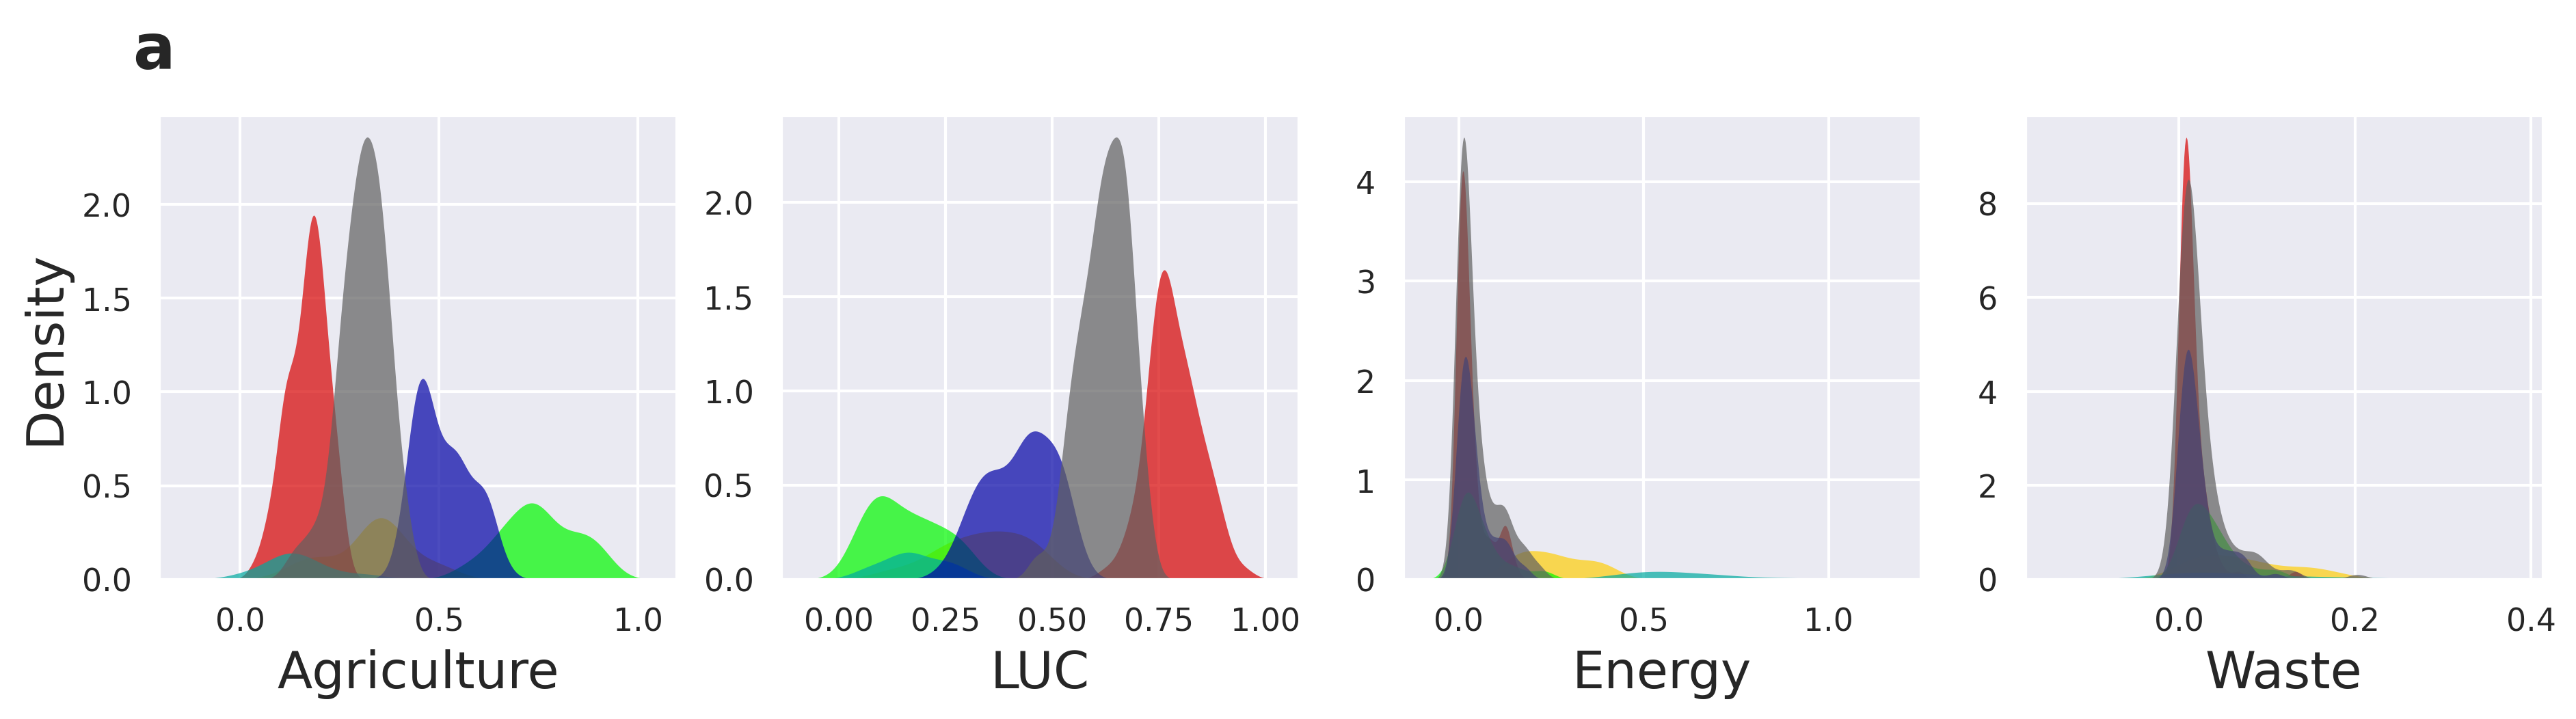

In [9]:
color=correct_color[0:-1]
fig = plt.figure(figsize = (15,3),dpi=300)

count=1

# plotting the probability density plot for each sector and group
for setor in features:
    plt.subplot(1,4,count)    
    ax=sns.kdeplot(data=data, x=setor, hue="group",palette=color ,fill=True,
   alpha=.7, linewidth=0)
    
    ax.set_xlabel(setor, fontsize=fontsize)
    
    # caption only for the first picture
    if count ==1:
        ax.set_ylabel("Density", fontsize=fontsize)
        ax.text(-0.15/3, 1.1, 'a', transform=ax.transAxes, 
            size=22, weight='bold')
        ax.legend_.set_title(None)
    else: 
        ax.set_ylabel(" ", fontsize=fontsize)
    count+=1
    ax.legend([],[], frameon=False)

plt.savefig("/content/matopiba_emissions/output/figure2a.pdf", format="pdf", dpi=1000)

MATOPIBA
Agriculture    35.48
LUC            54.25
Energy          7.53
Waste           2.74
dtype: float64

Group: 1
Agriculture    30.85
LUC            62.38
Energy          4.44
Waste           2.33
dtype: float64

Group: 2
Agriculture    51.07
LUC            42.48
Energy          4.34
Waste           2.11
dtype: float64

Group: 3
Agriculture    14.70
LUC            17.42
Energy         60.65
Waste           7.23
dtype: float64

Group: 4
Agriculture    75.18
LUC            15.63
Energy          5.66
Waste           3.53
dtype: float64

Group: 5
Agriculture    16.90
LUC            78.57
Energy          3.11
Waste           1.42
dtype: float64

Group: 6
Agriculture    33.16
LUC            33.66
Energy         25.70
Waste           7.47
dtype: float64



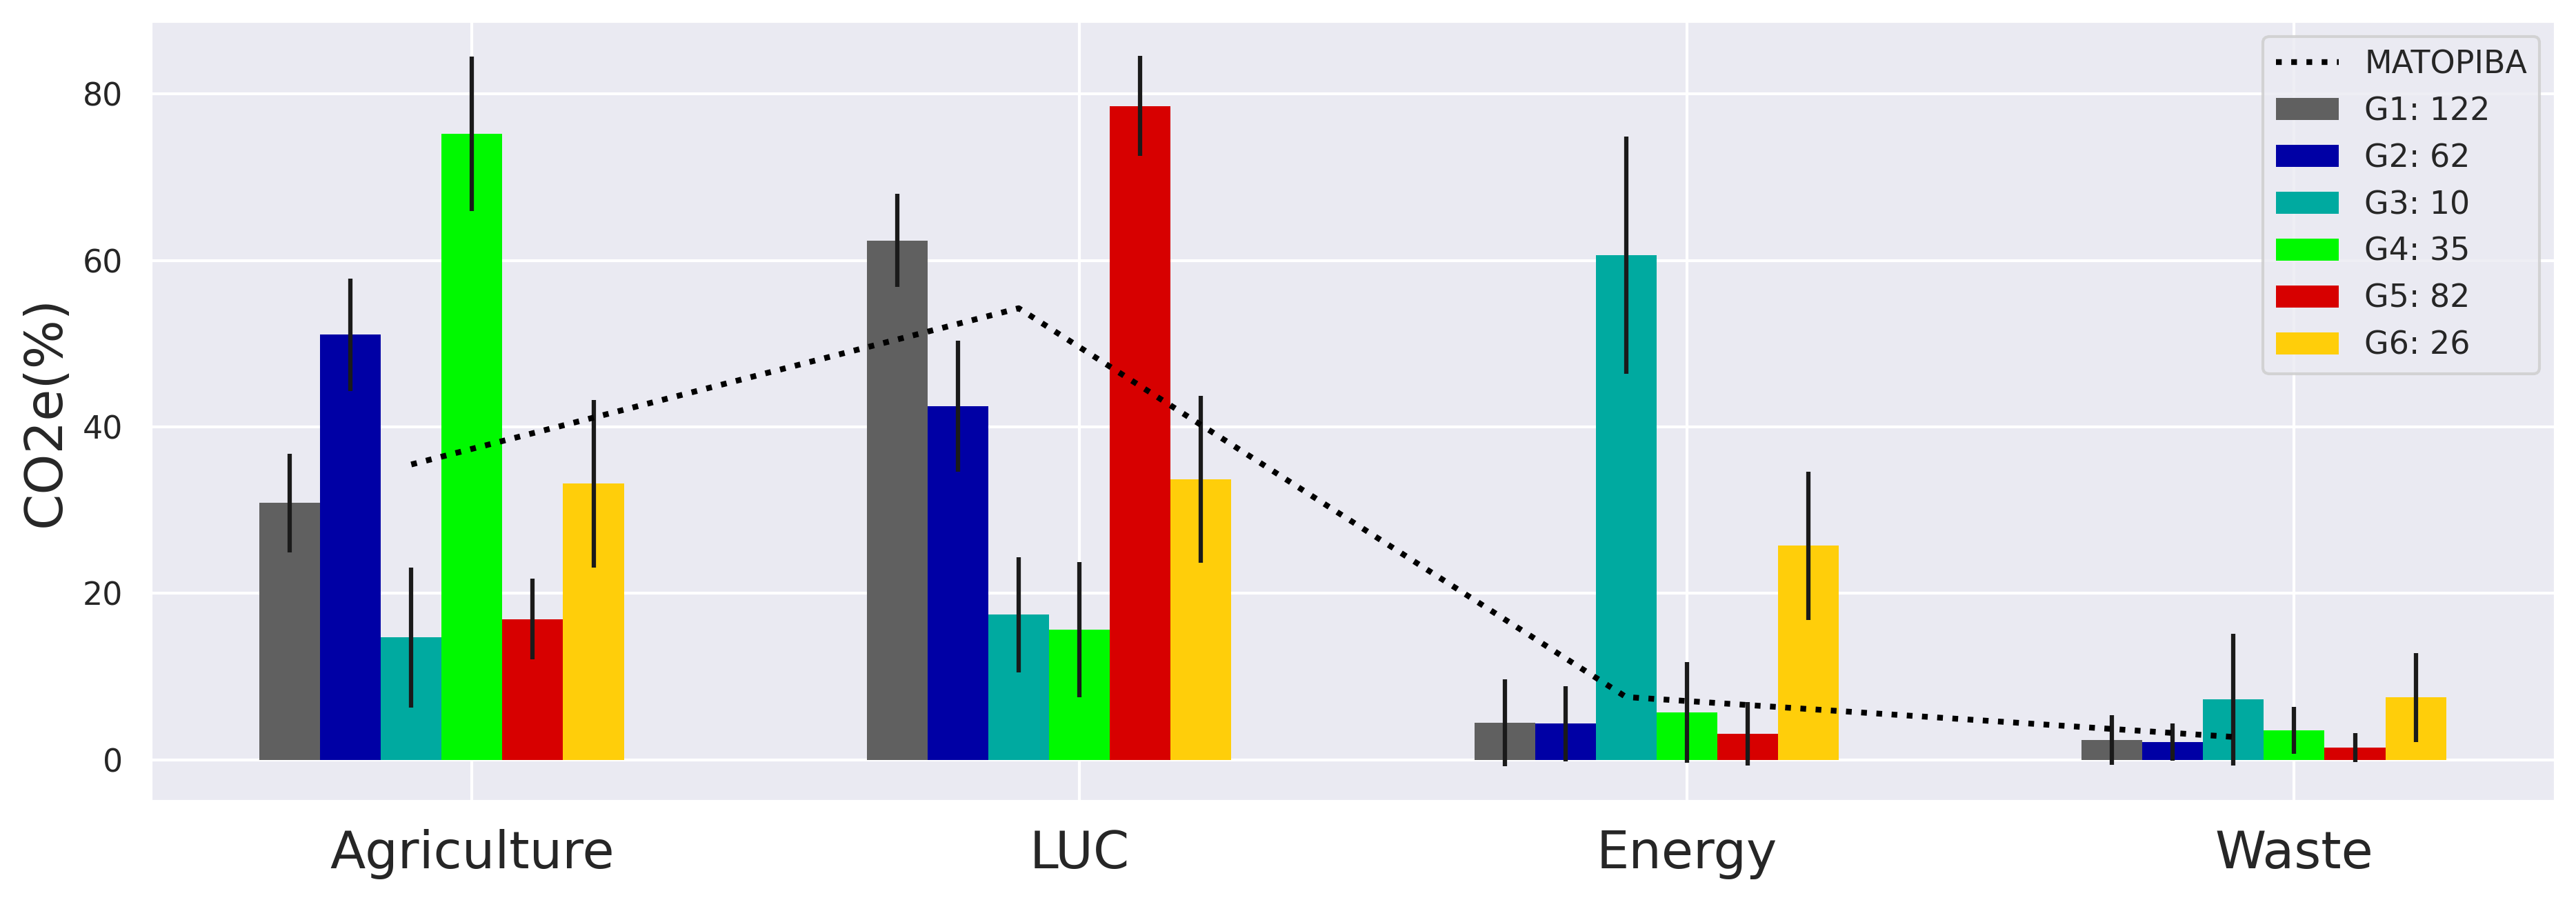

In [10]:
# Vizualization of the average and standard deviation of emissions for each group and sector
def bar_grupos(dados_sc,k):
  x = list(dados_sc.columns)[0:-1]
  
  fig = plt.figure(figsize = (15,5),dpi = 300)

  #Approving to extract the exact average emission values
  print("MATOPIBA")
  print(round(dados_sc.drop(['group'],axis=1).mean()*100,2))
  print()
    
  j=0
  barWidth = 0.1
  r = np.arange(4)
  r = [x-3*barWidth for x in r]
  for i in range(1,k+1):
    dado_g = dados_sc.loc[dados_sc['group']==i]
    dado_g = dado_g.drop(['group'],axis=1)
    dado_g = dado_g

    color=correct_color[i-1]

    r = [x + barWidth for x in r]
    plt.bar(r, dado_g.mean()*100, width = barWidth, color = color, 
            edgecolor = 'white', lw=0.0, alpha=1, yerr=dado_g.std()*100, label=str('G'+str(i)+': '+str(dado_g.shape[0])))
    
    #Approving to extract the exact average emission values
    print("Group: "+str(i))
    print(round(dado_g.mean()*100,2))
    print()
    j+=1

  #plotting the matopiba average
  dado_g = dados_sc.drop(['group'],axis=1)
  r = [x-3*barWidth for x in r]
  plt.grid(True)
  plt.plot(r,dado_g.mean()*100,':',label=('MATOPIBA'), 
        linewidth=2,color = 'black') 

  #Adjusting the x-axis
  plt.xticks([r + barWidth for r in range(len(dado_g.mean()))],x,fontsize=fontsize)
  plt.ylabel('CO2e(%)',fontsize=fontsize)
  plt.legend()
  ax.text(-0.15/3, 1.1, 'b', transform=ax.transAxes, 
            size=22, weight='bold')
 
    
bar_grupos(data[features_group],max(data.group))

plt.savefig("/content/matopiba_emissions/output/figure2b.pdf", format="pdf", dpi=1000)

##  Groups issuance profile

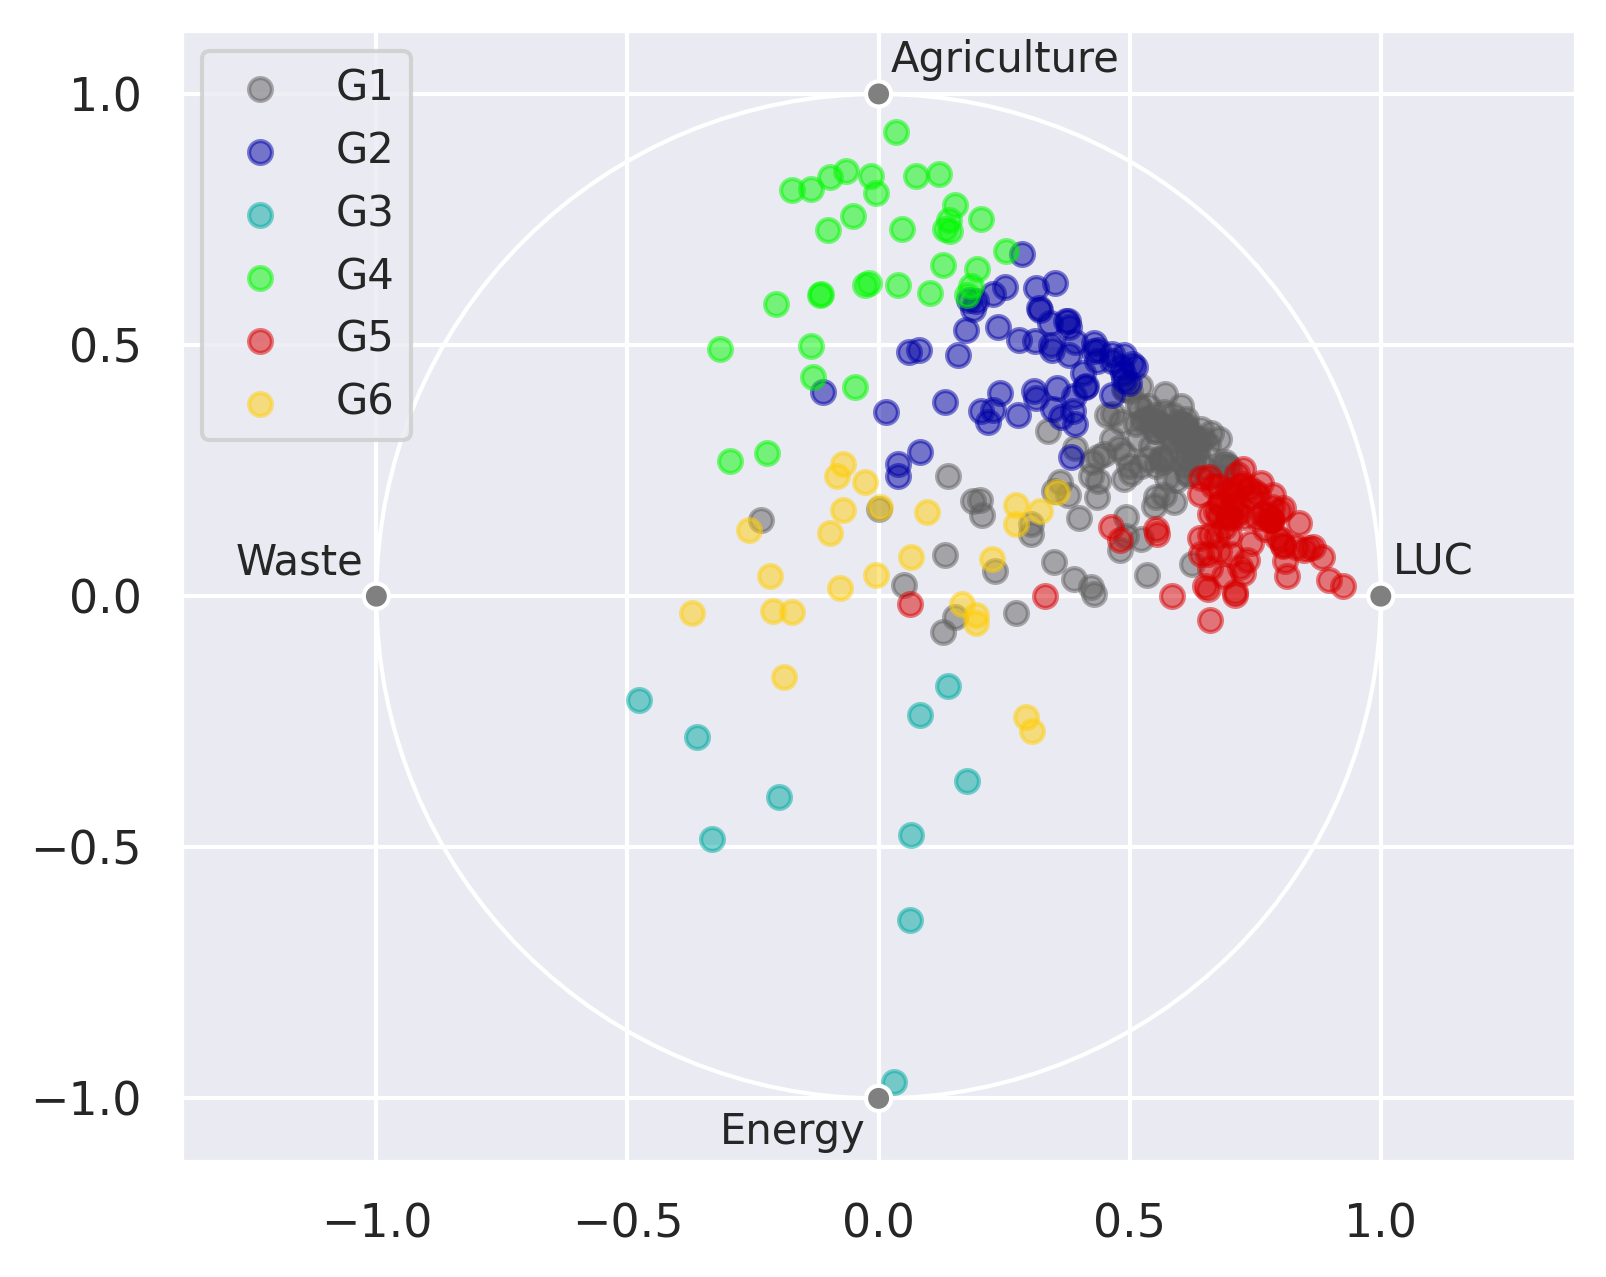

In [11]:
color=correct_color[0:-1]
fig = plt.figure(figsize = (6,5),dpi = 300)

#Visualization of emissions from all sectors in a single 4D scatter plot
radviz(data[["LUC","Agriculture","Waste","Energy","group_name"]].sort_values(by='group_name'),
       'group_name',color = color,alpha=0.5,s=30)
plt.legend(loc='upper left', ncol=1,fontsize=10)
plt.savefig("/content/matopiba_emissions/output/figure3.pdf", format="pdf", dpi=1000)

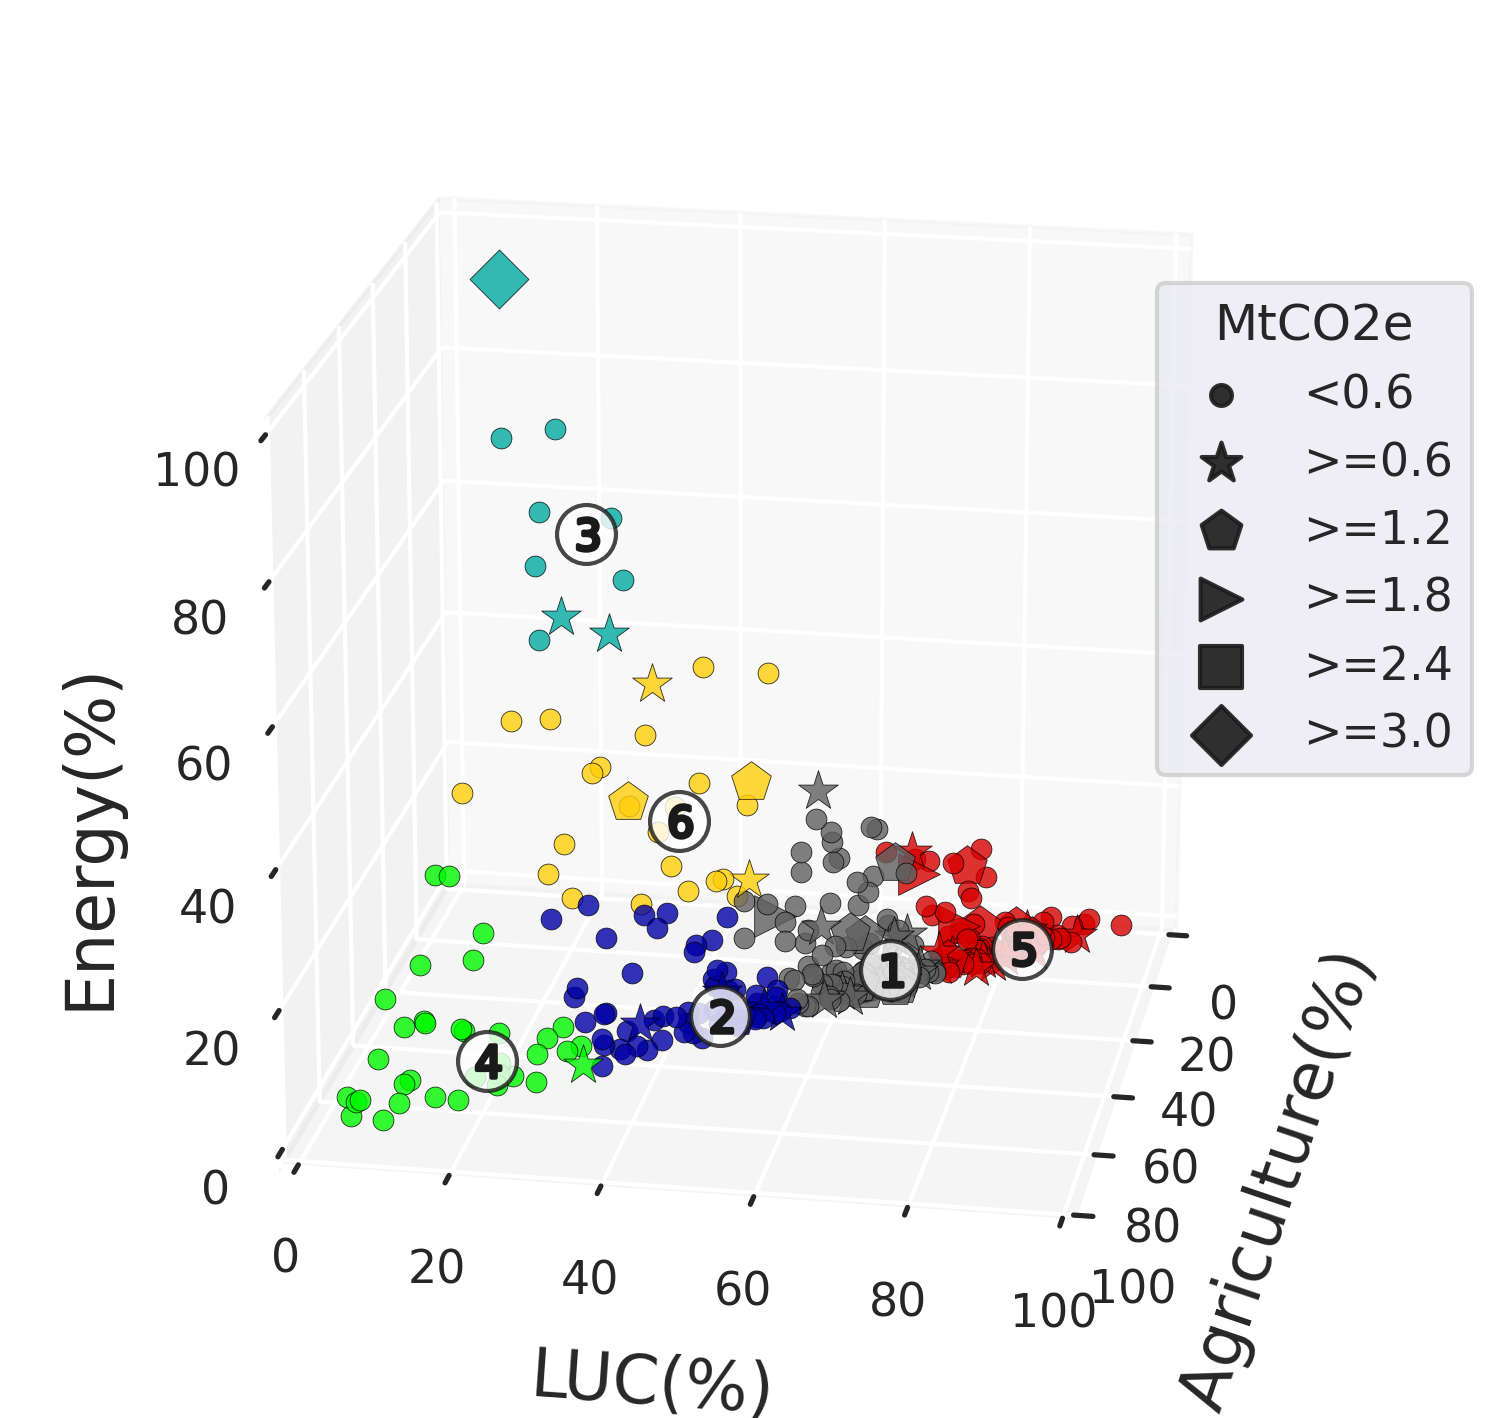

<Figure size 432x288 with 0 Axes>

In [12]:
# Reading the center of clusters for use in the following graphs 
centers = np.load('/content/matopiba_emissions/data/clusters_centers.npy')

fig = plt.figure(figsize = (6,6),dpi = 300)
ax = fig.add_subplot(111, projection='3d')

# Setting symbols for the absolute emissions scale
max_emi = max(data.emi_2018)
faixa = max_emi/5
markers = ['.','*','p','>','s','D']

for i in range(1,7):
  m=-1
  for j in data[data.group==i].emi_2018.values:
    m=m+1
    # Defining the emission range to select the correct symbol
    size = 10+int(j/max(data[data.group==i].emi_2018)*90)
    line=ax.scatter3D(data[data.group==i]['Agriculture'].values[m]*100,
                      data[data.group==i]['LUC'].values[m]*100, data[data.group==i]['Energy'].values[m]*100,
                      color=correct_color[i-1], s=100,edgecolor='black',
                      linewidth=0.2,marker=markers[int(j/faixa)],alpha=0.8)
    
ax.view_init(20,10)

lege=['<0.6','>=0.6','>=1.2','>=1.8','>=2.4','>=3.0']
le=0

# Plotting any point just to add the legend of the symbols
for marker in markers:
  ax.scatter3D(-100,-100,-100, color=(0.1,0.1,0.1,1), alpha=0.9,s=100,marker=marker,label=lege[le])
  le=le+1


ax.zaxis.set_rotate_label(False)
ax.set(xlim=(0, 100), ylim=(0, 100),zlim=(0, 100))
ax.set_zlabel('Energy(%)\n',fontsize=fontsize-2,rotation=90)
ax.set_ylabel('\nLUC(%)', fontsize=fontsize-2)
ax.set_xlabel('\n Agriculture(%)', fontsize=fontsize-2)
ax.legend(title='MtCO2e',loc='best', bbox_to_anchor=(0.55, 0.33, 0.5, 0.5))



# Draw white circles at cluster centers
grupos_count = data.groupby('group').count()
group_size = list(grupos_count['Municipalities'])

for i, c in enumerate(centers):
  color=correct_color[i-1]
  
  ax.scatter3D(c[0]*100+5, c[1]*100+5, c[2]*100, marker='o',
          c='white', alpha=.8, s=200, edgecolor='k') #*group_size[i]
  ax.scatter3D(c[0]*100+5, c[1]*100+5,c[2]*100, marker='$%d$' % int(i+1), alpha=1,
              s=60, edgecolor='k',c='k')#color
ax.patch.set_facecolor('xkcd:white')
plt.show()
plt.savefig("/content/matopiba_emissions/output/figure4a3D.pdf", format="pdf", dpi=1000)

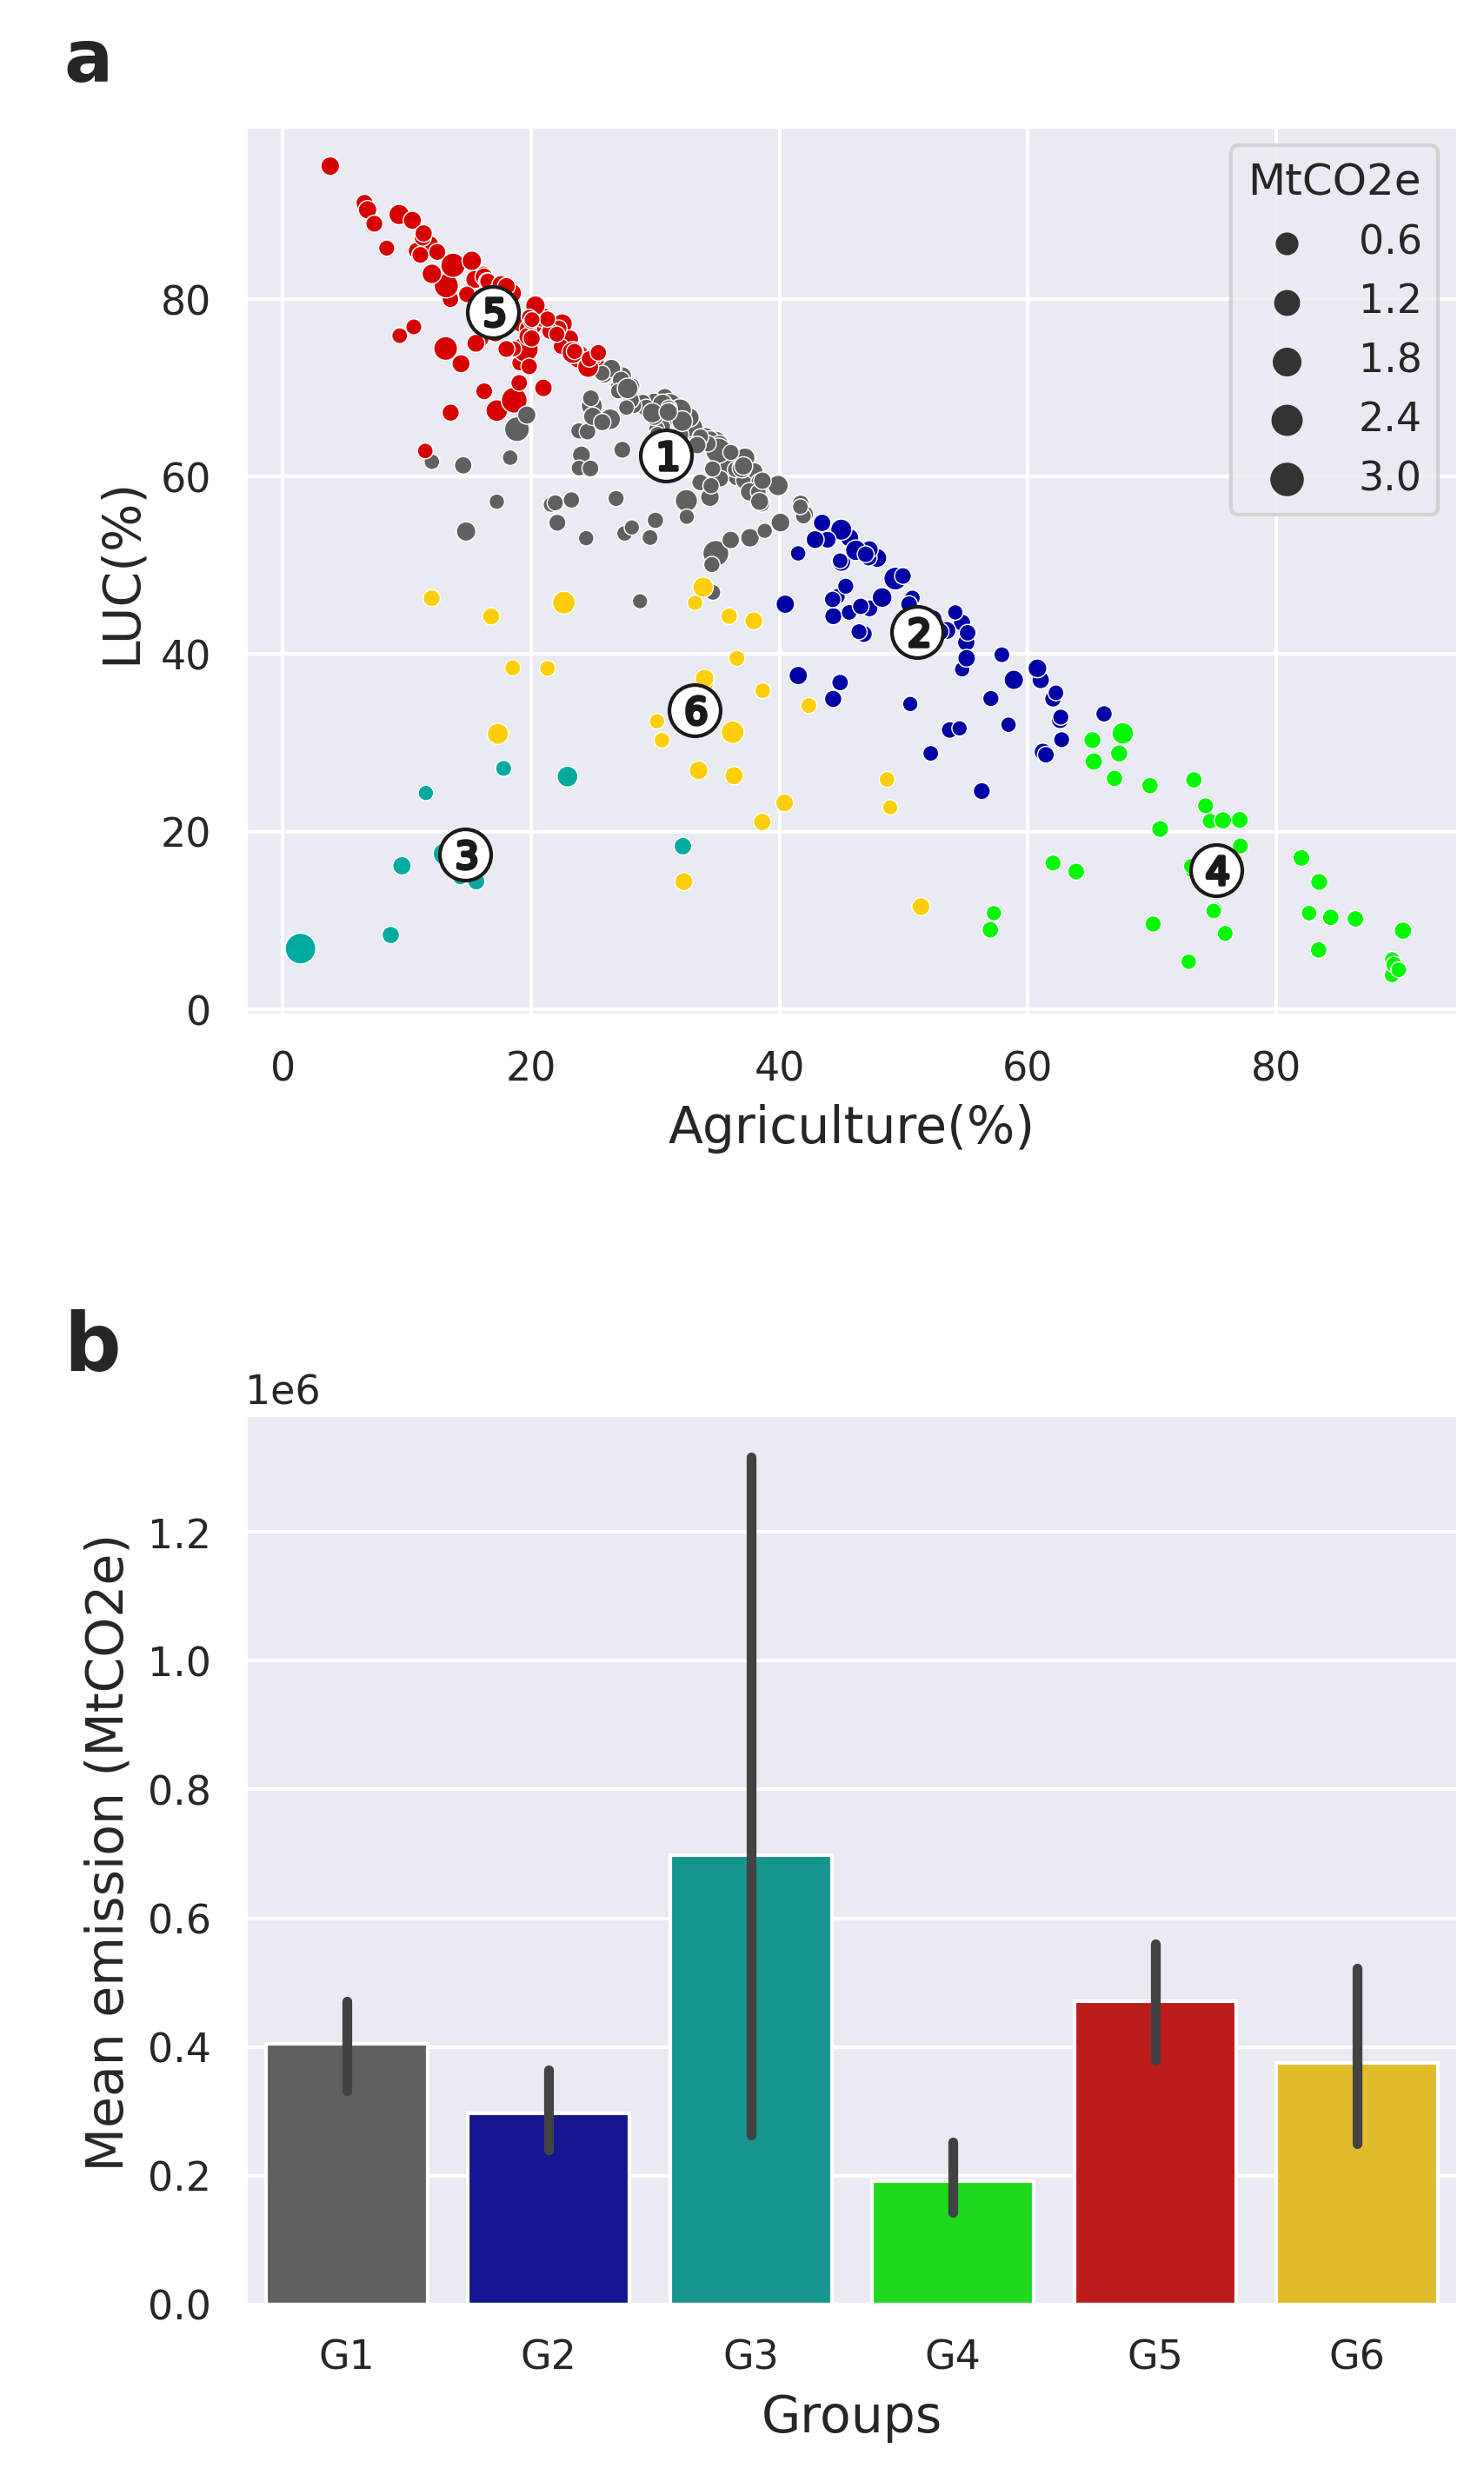

In [13]:
import matplotlib.gridspec as gridspec
fontsize=14
fig = plt.figure(figsize = (6,12),dpi = 300)
gs = gridspec.GridSpec(13, 1)

ax = fig.add_subplot(gs[0:5, 0])

n_clusters=k


color = correct_color[0:-1]


ax=sns.scatterplot(data=data*100 , x="Agriculture", y="LUC",  hue="group",legend = False,  alpha=1,
                   size ="emi_2018",s=5000, marker='o',  palette=color) 
ax=sns.scatterplot(data=data*100 , x="Agriculture", y="LUC", size ="emi_2018",alpha=0.0,
           palette=color) 
ax.set_ylabel('LUC(%)',fontsize=fontsize)
ax.set_xlabel('Agriculture(%)', fontsize=fontsize)
ax.text(-0.15, 1.05, 'a', transform=ax.transAxes, 
    size=20, weight='bold')
plt.legend(title='MtCO2e')


# Draw white circles at cluster centers
grupos_count = data.groupby('group').count()
group_size = list(grupos_count['Municipalities'])

for i, c in enumerate(centers):
  color=correct_color[i]
  
  ax= plt.scatter(c[0]*100, c[1]*100, marker='o',
          c='white', alpha=1, s=200, edgecolor='k') #*group_size[i]
  ax=plt.scatter(c[0]*100, c[1]*100, marker='$%d$' % int(i+1), alpha=1,
              s=60, edgecolor='k',c='k')#color


ax = fig.add_subplot(gs[7:12, 0])    

ax = sns.barplot(x='group_name', y="emi_2018",alpha=1,
                      data=data.sort_values(by=['group']),palette=correct_color[0:-1])
ax.set_xlabel('Groups',fontsize=fontsize)
ax.set_ylabel('\n Mean emission (MtCO2e)', fontsize=fontsize)
ax.text(-0.15, 1.05, 'b', transform=ax.transAxes, 
    size=22, weight='bold')


plt.savefig("/content/matopiba_emissions/output/figure4.pdf", format="pdf", dpi=1000)

### Testing for the presence of correlations

In [14]:
_, p1 = stats.normaltest(data['Agriculture'])
_, p2 = stats.normaltest(data['LUC'])
print("Normality test: ",p1,p2)
data[["Agriculture", 'LUC']].corr()
## -0.783561

Normality test:  9.193029448768542e-09 4.426839940695203e-06


,Agriculture,LUC
Agriculture,1.000000,-0.762074
LUC,-0.762074,1.000000


In [15]:
#excluding group 3
_, p1 = stats.normaltest(data['Agriculture'][data.group !=3])
_, p2 = stats.normaltest(data['LUC'][data.group !=3])
print("Normality test: ",p1,p2)
data[["Agriculture", 'LUC']][data.group !=3].corr()
## -0.882981

Normality test:  1.552811052175512e-08 2.4644936846142753e-05


,Agriculture,LUC
Agriculture,1.000000,-0.880528
LUC,-0.880528,1.000000


In [16]:
#excluding group 6
_, p1 = stats.normaltest(data['Agriculture'][data.group !=3][data.group !=6])
_, p2 = stats.normaltest(data['LUC'][data.group !=3][data.group !=6])
print("Normality test: ",p1,p2)
data[["Agriculture", 'LUC']][data.group !=3][data.group !=6].corr()
## -0.954353

Normality test:  2.197562447161024e-07 1.0727825091246505e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Agriculture,LUC
Agriculture,1.000000,-0.948818
LUC,-0.948818,1.000000


In [17]:
data[data.group==5].sort_values(by='emi_2018',ascending=False).head(5)

,States,Municipalities,emi_2018,emi_agri_2018,emi_luc_2018,emi_energy_2018,emi_waste_2018,pib_2018,population,Agriculture,LUC,Energy,Waste,group,group_name
94,BA,Correntina,1991731.83,371215.01,1366565,244717.75,9234.07,1944161.68,32081,0.186378,0.686119,0.122867,0.004636,5,G5
137,MA,Grajaú,1978841.31,386536.69,1471716,101171.49,19417.13,751654.33,68876,0.195335,0.743726,0.051127,0.009812,5,G5
150,MA,Itinga do Maranhão,1660611.19,227694.68,1391740,29303.10,11873.41,321167.19,25931,0.137115,0.838089,0.017646,0.007150,5,G5
83,MA,Codó,1616341.21,212846.61,1317333,47292.27,38869.33,963180.19,122597,0.131684,0.815009,0.029259,0.024048,5,G5
40,MA,Barra do Corda,1595140.78,272482.87,1228381,67637.99,26638.92,723386.24,87793,0.170821,0.770077,0.042403,0.016700,5,G5
